# Diabetes Risk Prediction - EDA

In this notebook we'll gather information about the dataset.

# 📚 Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.float_format', lambda x:'%.3f' % x)
import warnings
warnings.simplefilter(action="ignore", category=Warning)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
sb.set_palette('Paired')

# 📖 Load Data

In [2]:
raw_data = pd.read_csv('../Data/Raw/diabetes_risk_prediction_dataset.csv')
raw_data.shape

(520, 17)

In [3]:
# Creating a copy of the dataframe in case we need the raw data in the next sections
df = raw_data.copy()

## Data Overview

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

🔎 **Observations:** Majority of the columns have object values. Only column 'Age' contains numeric values. It looks there are no missing values in the dataset.

## Checking for Missing Values

In [6]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [7]:
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [8]:
df.sample(10, random_state=101)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
359,48,Male,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,No,No,No,No,Positive
243,35,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Negative
213,49,Male,No,Yes,No,No,No,No,No,Yes,No,No,Yes,No,No,Yes,Negative
64,45,Female,No,No,No,No,No,No,Yes,Yes,No,No,Yes,No,No,No,Positive
100,48,Female,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Positive
130,47,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Positive
265,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
272,47,Male,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,Negative
289,40,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Negative
189,69,Female,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Positive


## Checking for Duplicates

In [9]:
df.duplicated().sum()

269

In [10]:
df[df.duplicated() == True]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
84,35,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
159,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
160,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
161,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
162,35,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
497,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
498,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
499,64,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Negative


In [11]:
df.drop_duplicates(inplace=True)

## Summary Statistics

In [12]:
df.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,251.000,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,Positive
freq,NaN,160,132,127,147,159,134,184,140,127,180,126,139,153,161,207,173
mean,48.865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,48.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,58.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 📊 Exploratory Data Analysis (EDA) and Visualization

In [13]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)
        
print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 16 ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']
Numeric columns: 1 ['Age']


In [14]:
# Removing the label
cat_features = cat_cols[:-1]

## Univairate Analysis

### Categorical Columns

In [15]:
# Function to create labeled barplots for categorical features
def plot_counts(data, features, hue=None):
    
    """
    This function takes the name of the feature and plots the distribution
    of the categorical values and saves the figure for future usage using
    countplot function of seaborn.

    ---
    ### Parameters:
    - data <dataframe>: tabular data in data frame format.
    - features <list>: List of categorical columns in dataframe to be visualized.
    - hue <string>: Name of the hue.
    """
    
    # number of columns of the subplots
    n_cols = 2 
    # set the number of rows with the predefined number of columns
    n_rows = int(np.ceil(len(features)/n_cols)) 

    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, feature in enumerate(features):
        #bar_container = axes[i].bar(df[feature].value_counts().index, df[feature].value_counts().values)
        sb.countplot(
            data = data,
            x = feature,
            palette = 'Paired',
            hue = hue,
            ax = axes[i]
        )
        # Display count of each level of the category
        for p in axes[i].patches:
            label = p.get_height()
            x = p.get_x() + p.get_width() / 2 # Width of the plot
            y = p.get_height() # Height of the plot
            
            rotation = 0
            if hue is not None:
                rotation = 30  # Rotate annotations by 30 degrees if hue is not None

            axes[i].annotate(
                label,
                (x, y),
                ha = 'center',
                va = 'center',
                size = 12,
                xytext = (0, 5),
                textcoords = 'offset points',
                rotation = rotation
            )
            
        axes[i].set(ylabel='Count', title=feature, xlabel='')
        axes[i].tick_params(axis='x', rotation=90)

    # If the number of features is odd, remove the empty subplot
    if len(features) % 2 != 0:
        fig.delaxes(axes[-1])

plt.tight_layout()
plt.show(block=False)

<Figure size 640x480 with 0 Axes>

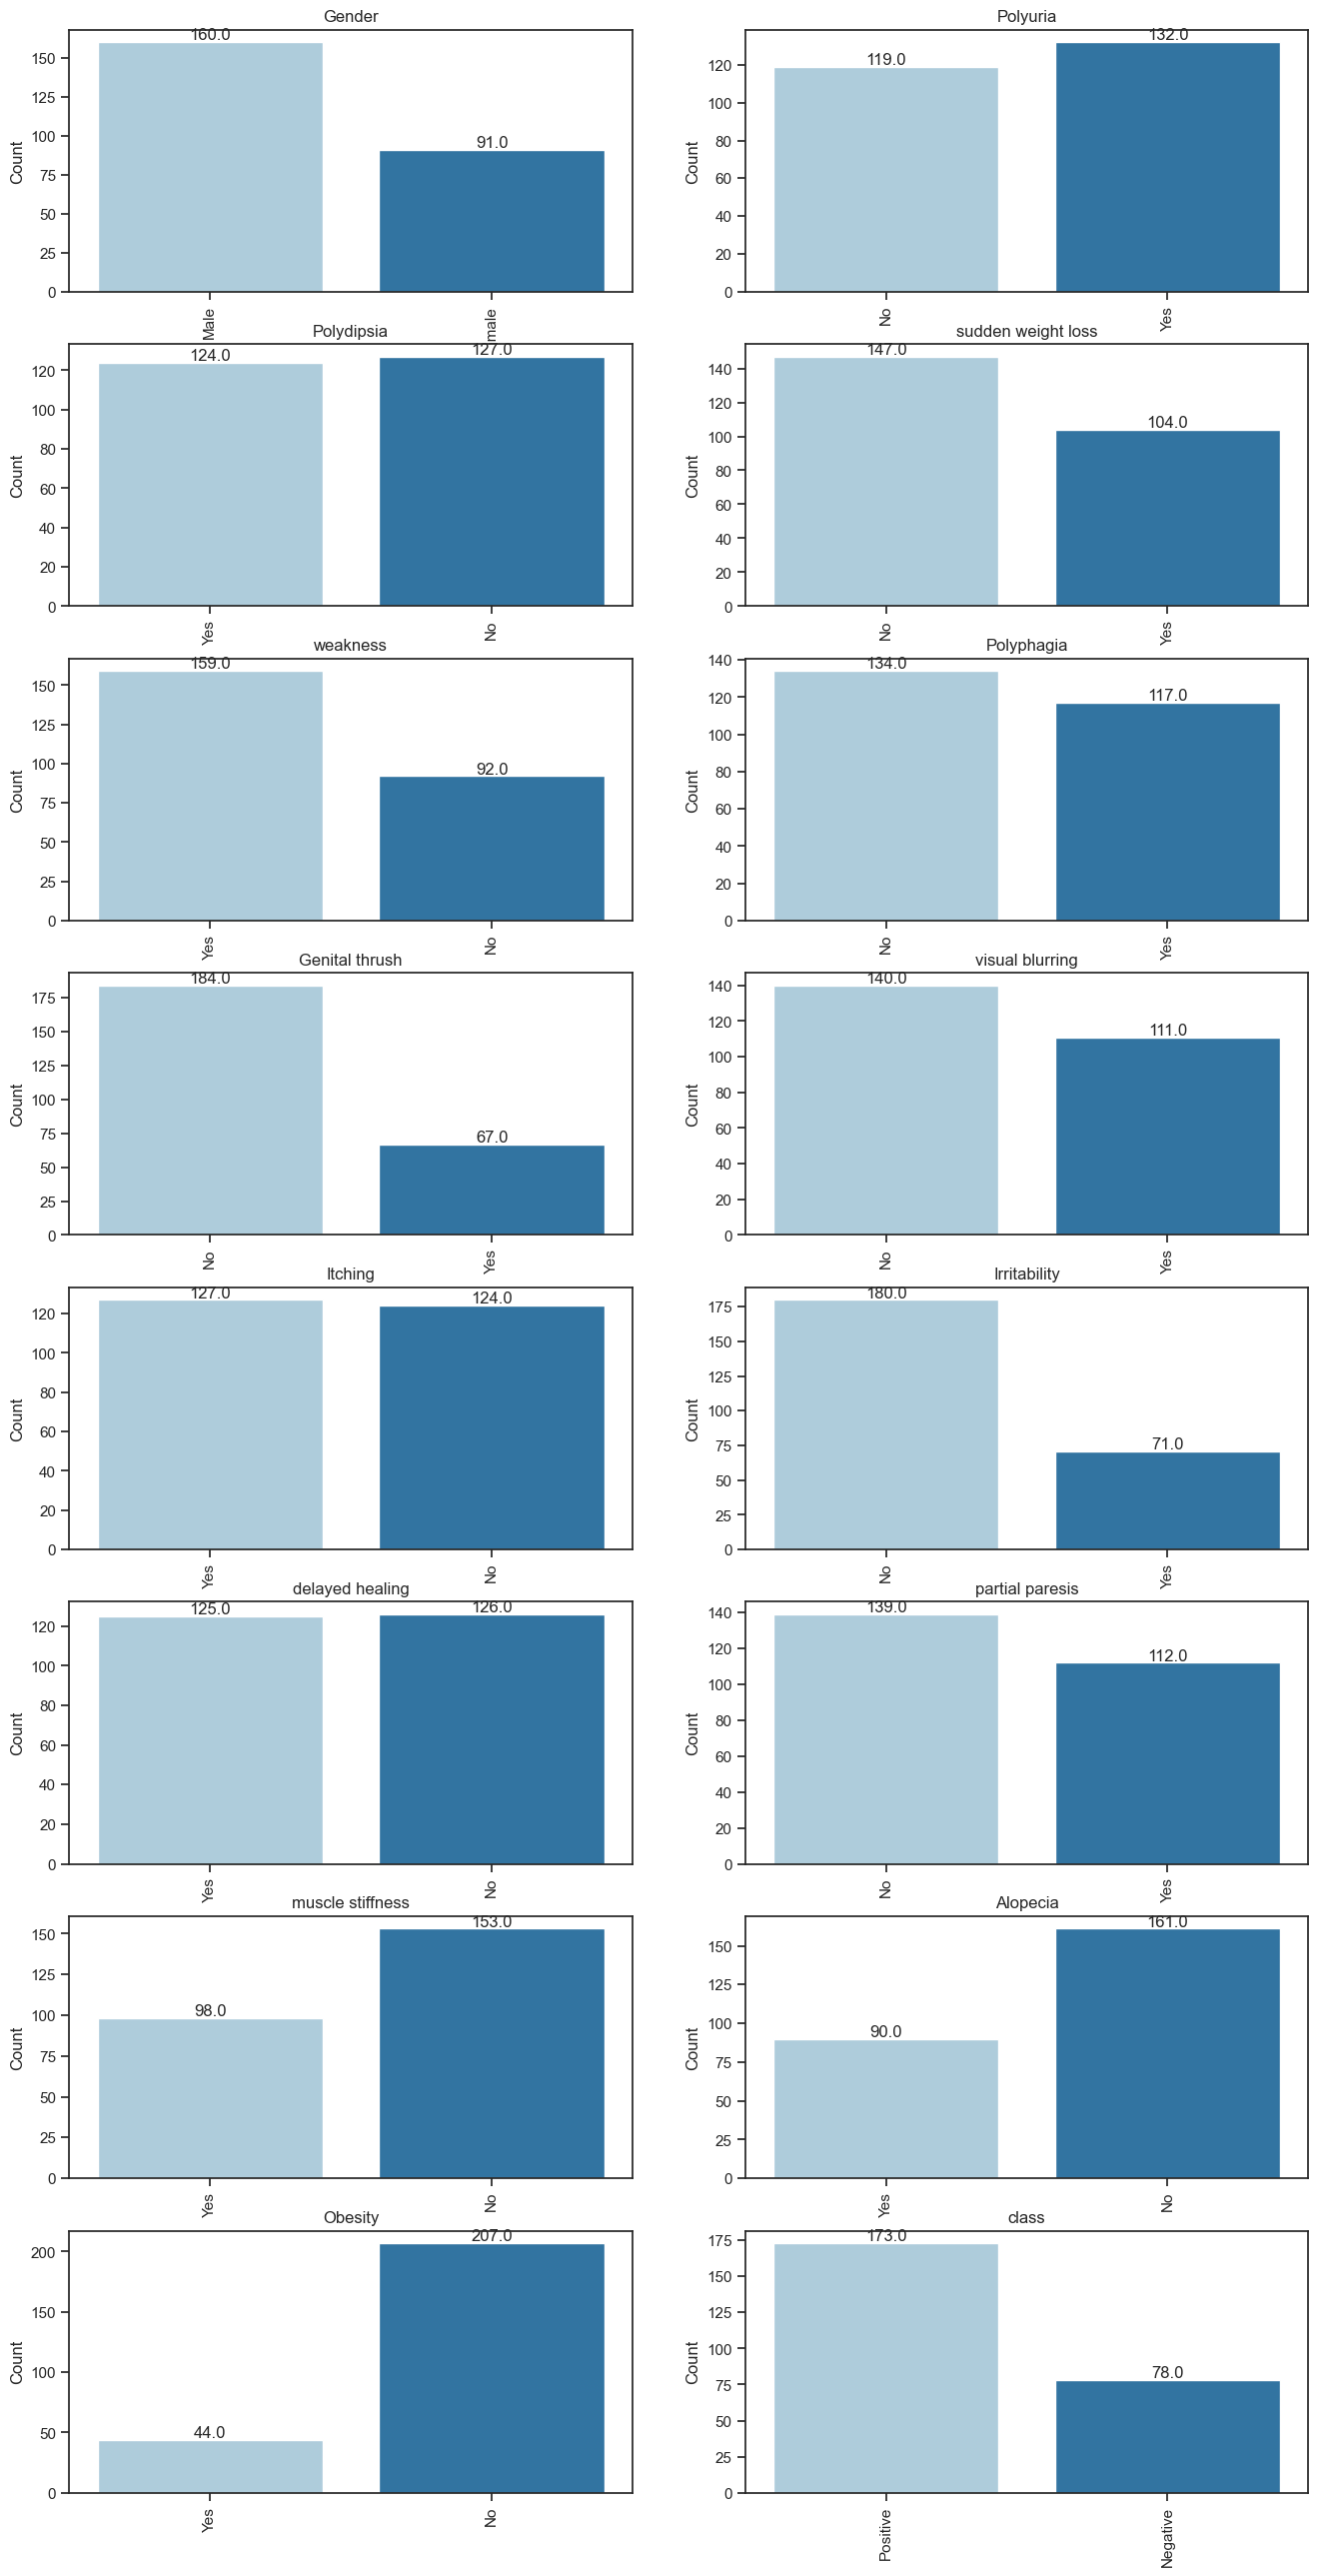

In [16]:
plot_counts(df, cat_cols)

🔎 **Observations:**

- The dataset is imbalanced.
- Majority of the records shows positive diabetes.
- All of the categorical features have binary values (Yes/No).
- There are no typo or any other value in the columns.

### Numeric Columns

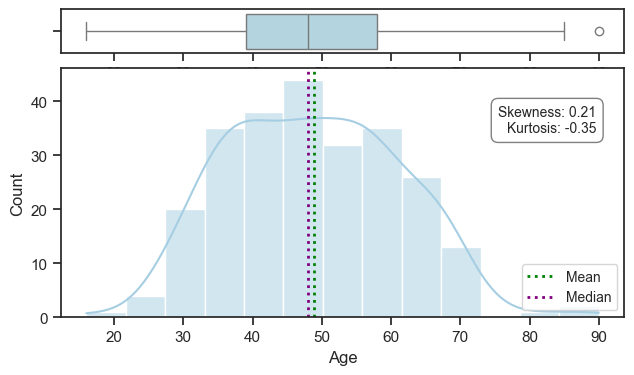

In [17]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(num_cols)/n_cols)) 

# Create figure
fig = plt.figure(figsize=(16, 4*n_rows))
outer = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.3)

for i in range(len(num_cols)):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], 
                                             wspace=0.1, hspace=0.1, height_ratios=(0.15, 0.85))

    ax_box = plt.Subplot(fig, inner[0])
    sb.boxplot(data=df, x=num_cols[i], color='lightblue', ax=ax_box)
    ax_box.set_xlabel('')
    fig.add_subplot(ax_box)
        
    mean_value = df[num_cols[i]].mean()
    median_value = df[num_cols[i]].median()
    ax_hist = plt.Subplot(fig, inner[1])
    sb.histplot(data=df, x=num_cols[i], kde=True, ax=ax_hist)
    ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
    ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')
    # Add a legend
    ax_hist.legend(loc='lower right', fontsize=10)
        
    # Calculate skewness and kurtosis
    skewness = df[num_cols[i]].skew()
    kurt = df[num_cols[i]].kurt()
    if skewness < 0:
        x=0.25
    else:
        x=0.95
    # Add skewness and kurtosis as text on the histogram plot
    ax_hist.text(x, 0.85, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}", 
                     transform=ax_hist.transAxes, verticalalignment='top', horizontalalignment='right',
                     bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'),
                fontsize=10)
    fig.add_subplot(ax_hist)

plt.tight_layout()
plt.show(block=False)

🔎 **Observations:** The Age column has almost normal distribution with a minimum number of outliers. We may consider the records with older than 80 years old as outliers.

## Bi-variate Analysis

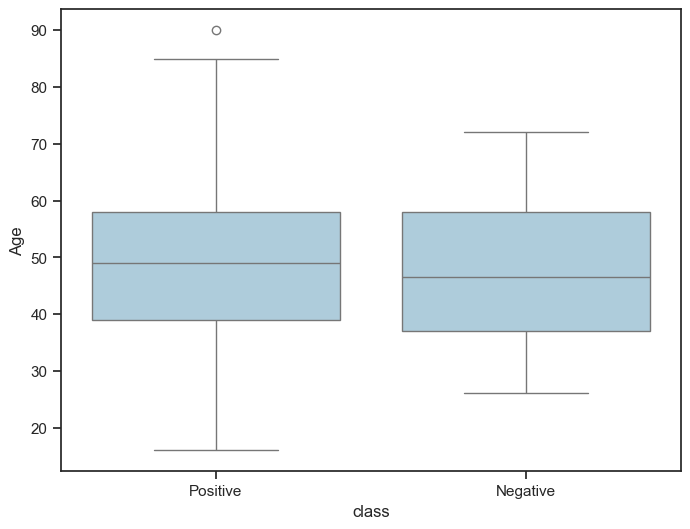

In [18]:
plt.figure(figsize=(8, 6))
sb.boxplot(data=df, y='Age', x='class')
plt.show()

🔎 **Observations:** It's more likely to have positive class if the Age of the record is less than 25 or higher than 75 according to the above plot.  

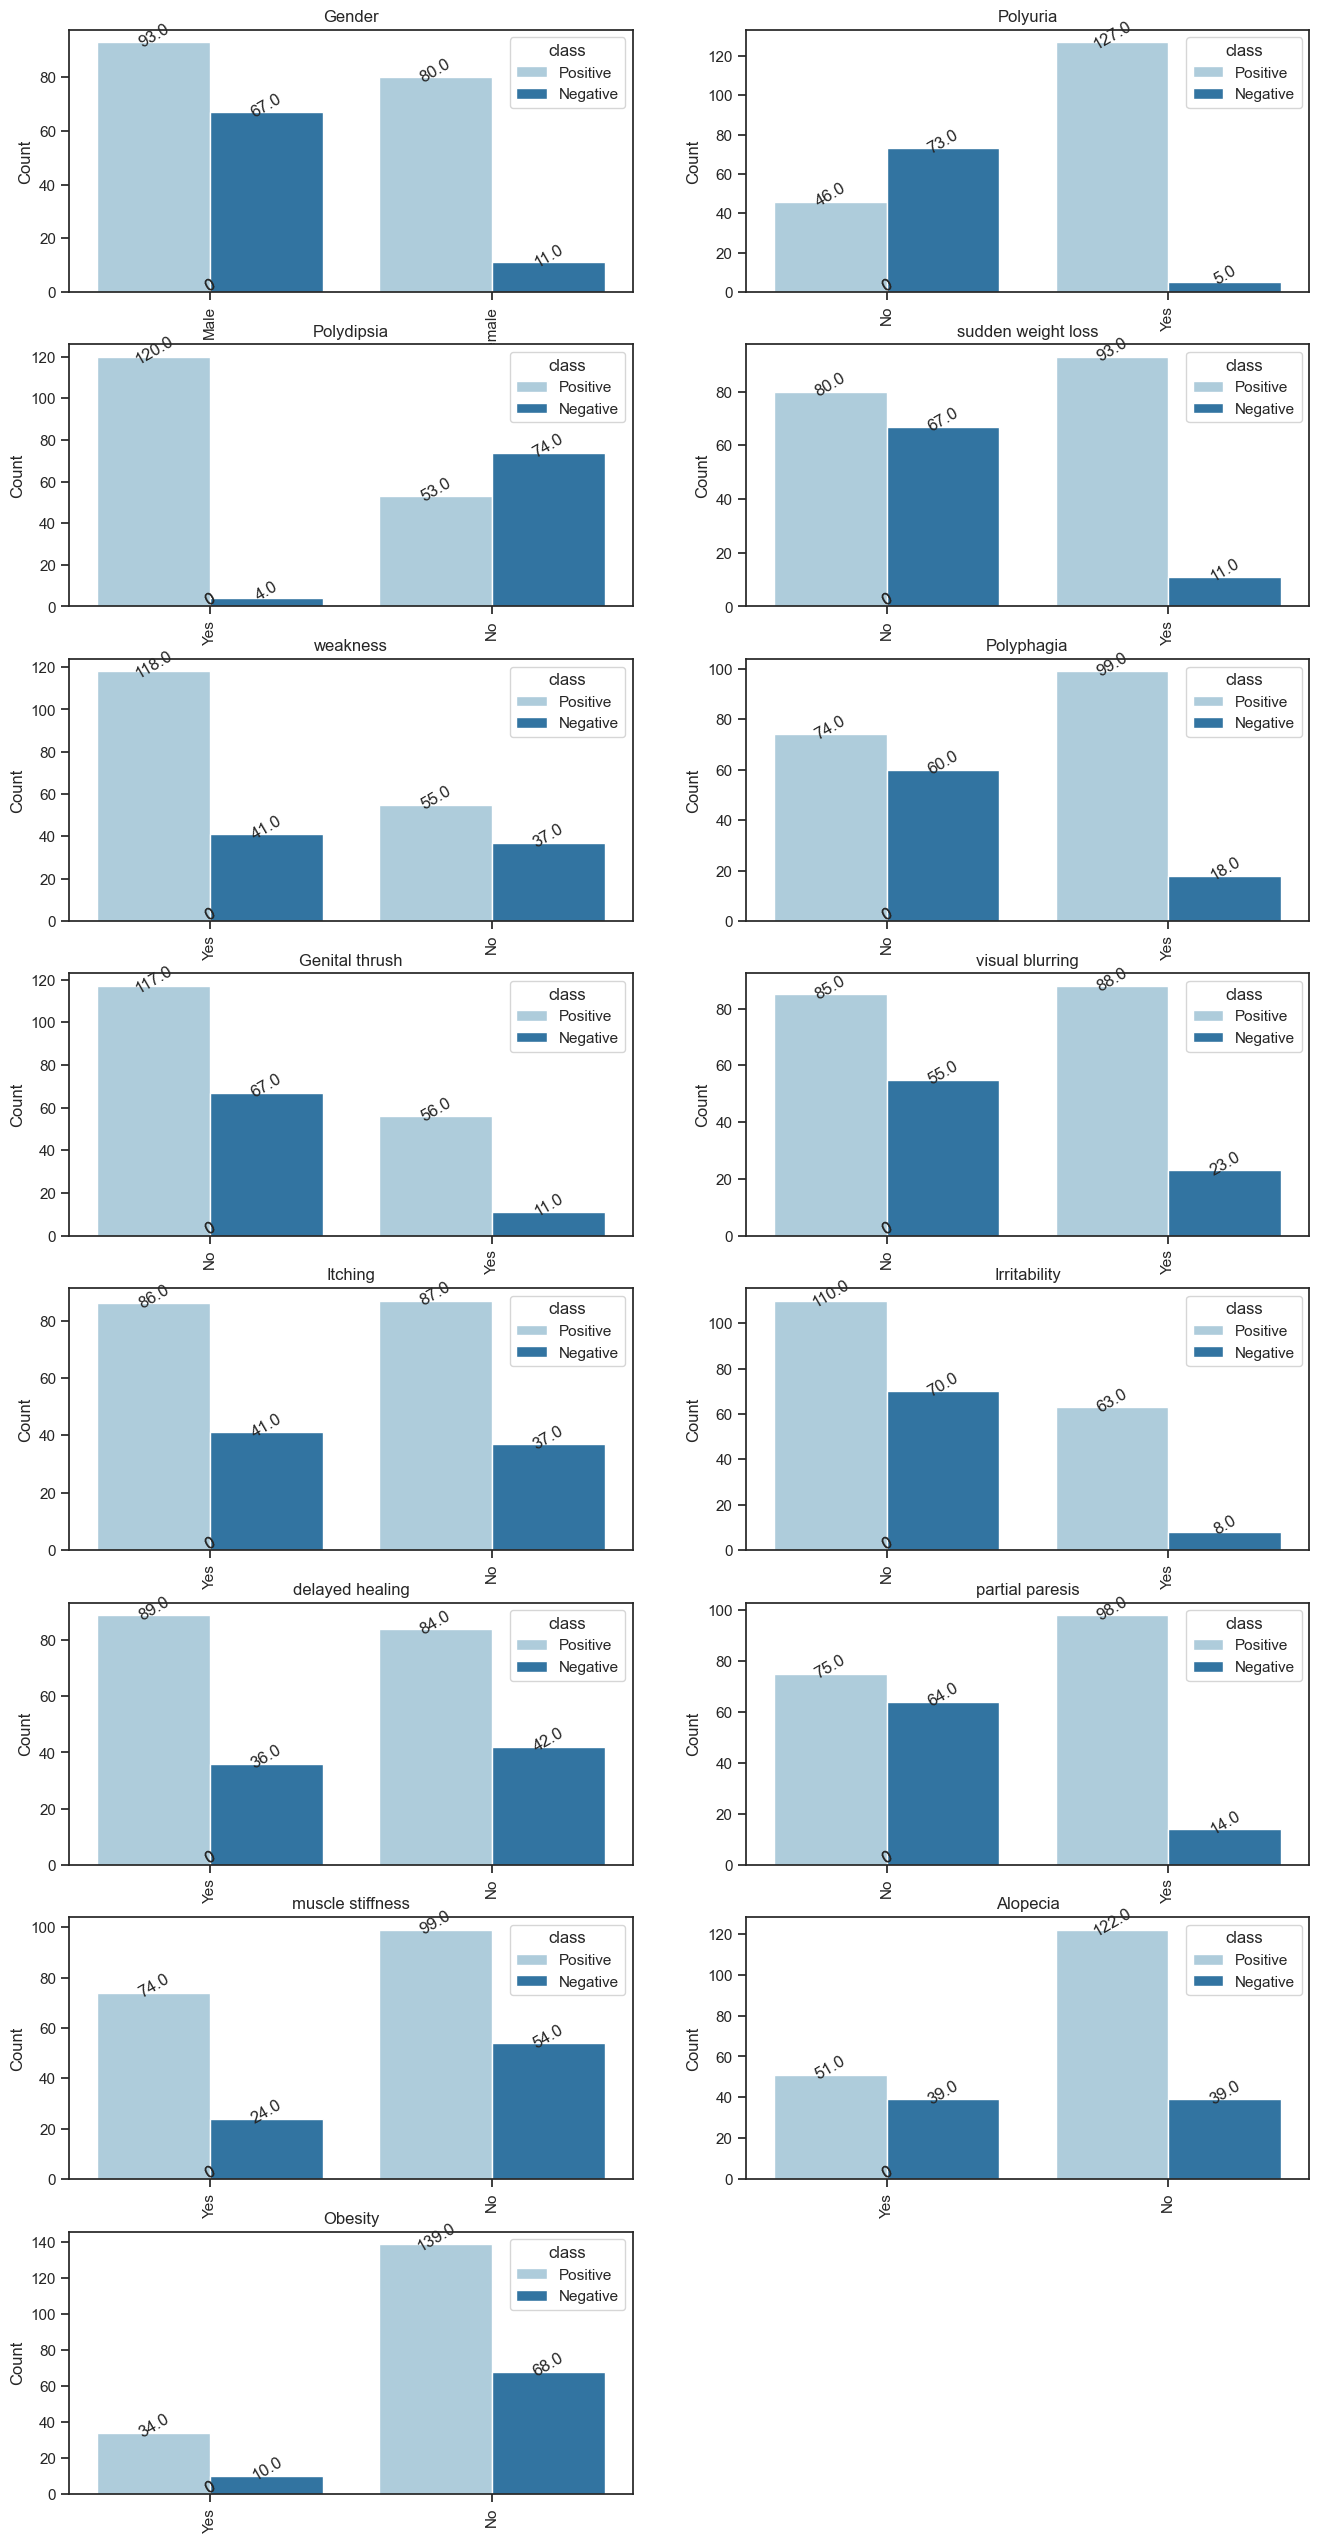

In [19]:
plot_counts(df, cat_features, hue='class')

🔎 **Observations:** 'partial paresis', 'sudden weight loss', 'Polyuria' and 'Polydipsia' has a correlation withe diabetes according to the dataste.

In [20]:
df.to_csv('../Data/Processed/data_no_duplicates.csv', index=False)